In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\Lenovo\Documents\Projects\CCP\Dataset\datalab_export_2024-05-25 09_10_12.csv')

In [3]:
missing_values = df.isnull().sum()
print(missing_values)

df.fillna(df.mean(), inplace=True)

Call Failure               0
Complaints                 0
Subscription Length        0
Charge Amount              0
Seconds of Use             0
Frequency of use           0
Frequency of SMS           0
Distinct Called Numbers    0
Age Group                  0
Tariff Plan                0
Status                     0
Age                        0
Customer Value             0
Churn                      0
dtype: int64


In [7]:
df = pd.get_dummies(df, columns=['Age Group', 'Tariff Plan', 'Status'])

In [9]:
numerical_cols = ['Call Failure', "Subscription Length", 'Seconds of Use', 'Frequency of use', 'Frequency of SMS', 'Distinct Called Numbers', 'Age', 'Customer Value']

scaler = StandardScaler()

df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [10]:
X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
model = RandomForestClassifier(random_state=42)

model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [12]:
y_pred = model.predict(X_test)

In [13]:
cm = confusion_matrix(y_test, y_pred)
print("COnfusion Matrix:")
print(cm)

cr = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(cr)

COnfusion Matrix:
[[15  0]
 [ 2  3]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94        15
           1       1.00      0.60      0.75         5

    accuracy                           0.90        20
   macro avg       0.94      0.80      0.84        20
weighted avg       0.91      0.90      0.89        20



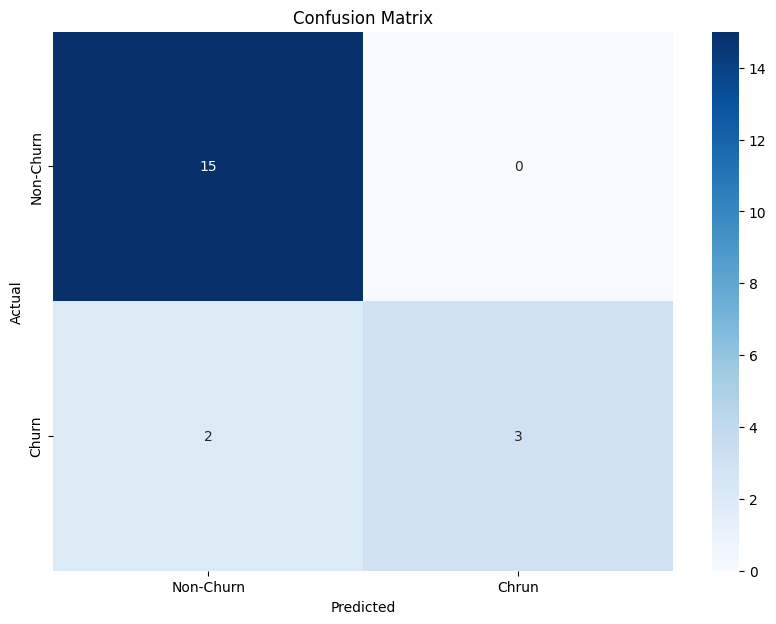

In [14]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Churn', "Chrun"], yticklabels=['Non-Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()